In [102]:
import pandas as pd
import numpy as np
import copy
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from numpy import mean
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
#import matplotlib.pyplot as plt
train_data=pd.read_csv("train.csv",encoding="latin1")
train_data.index=np.linspace(1,len(train_data),len(train_data))
test_data=pd.read_csv("test.csv",encoding="latin1")
new_train = copy.deepcopy(train_data)
del train_data["Choice"]


In [103]:
new_train.isnull()

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,...,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
1.0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2.0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3.0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4.0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5.0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6.0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7.0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8.0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9.0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10.0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


A_follower_count


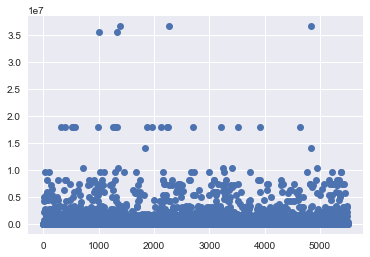

A_following_count


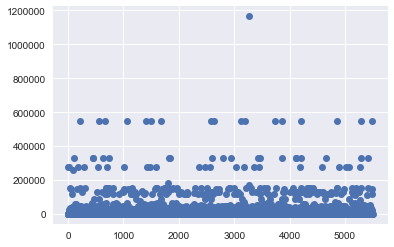

A_listed_count


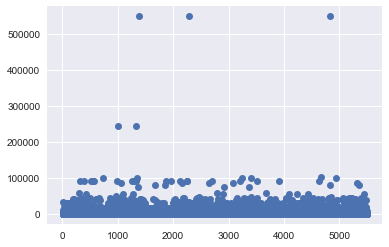

A_mentions_received


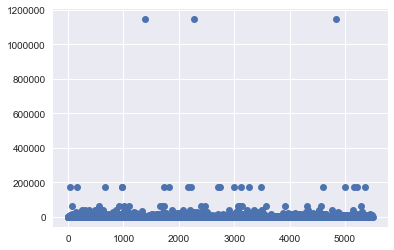

A_retweets_received


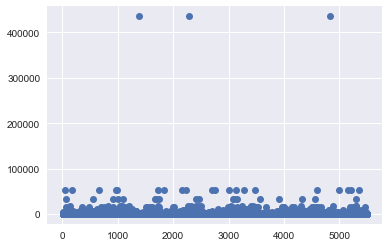

A_mentions_sent


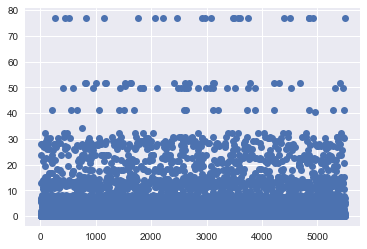

A_retweets_sent


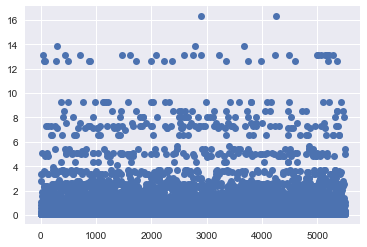

A_posts


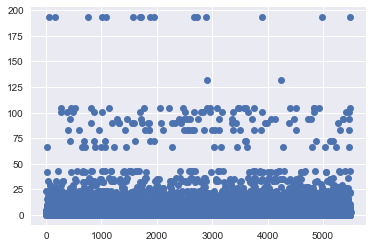

A_network_feature_1


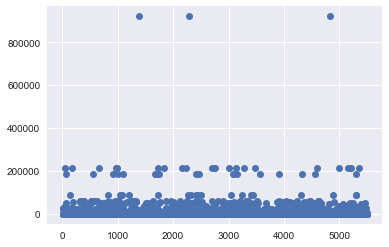

A_network_feature_2


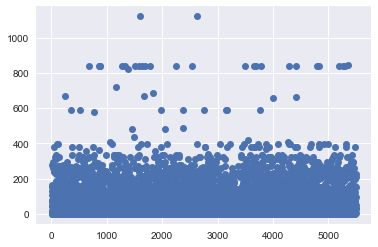

A_network_feature_3


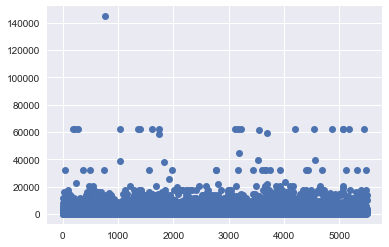

B_follower_count


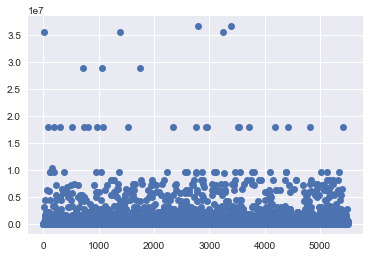

B_following_count


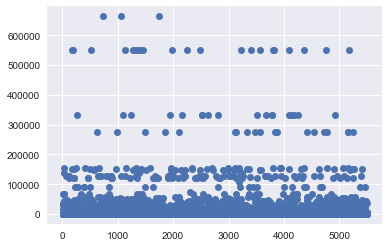

B_listed_count


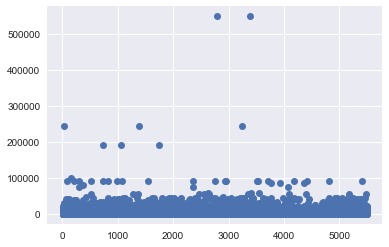

B_mentions_received


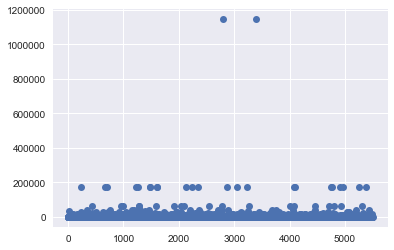

B_retweets_received


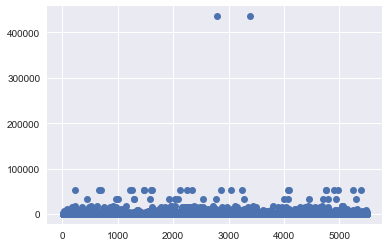

B_mentions_sent


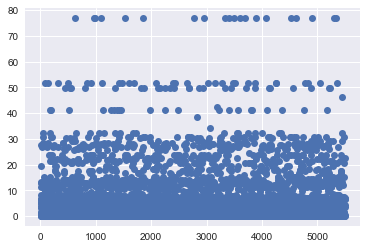

B_retweets_sent


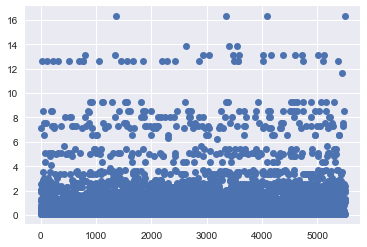

B_posts


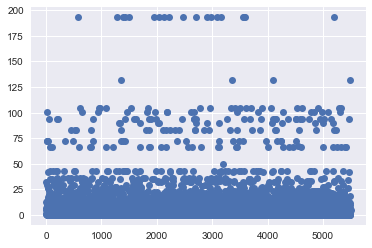

B_network_feature_1


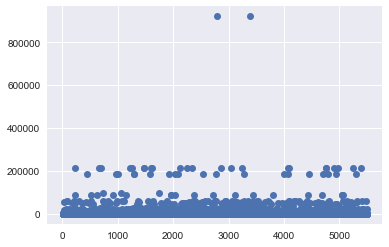

B_network_feature_2


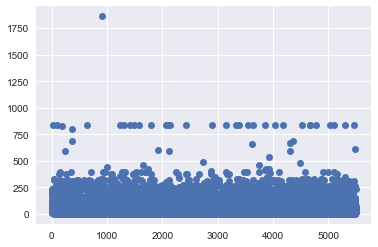

B_network_feature_3


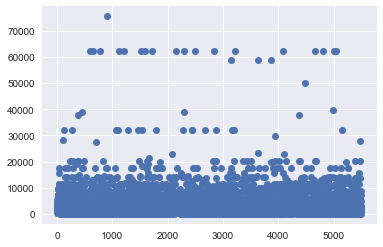

In [104]:
#checking for outliers
import matplotlib.pyplot as plt
for feature in train_data.columns:
    print(feature)
    plt.plot(train_data[feature],'o')
    plt.show()

In [105]:
#binning
for feature in train_data.columns:
    minimum=min(new_train[feature])
    maximum=max(new_train[feature])
    bins=np.linspace(minimum,maximum,6)[0:3]
    names=['one','two']
    categories=pd.cut(new_train[feature], bins, labels=names)
    new_train[feature+' '+'categories'] = pd.cut(new_train[feature], bins, labels=names)
    new_train[feature+' '+'scoresBinned'] = pd.cut(new_train[feature], bins)
    #category_count=pd.value_counts(categories)
    #print(category_count)
print(new_train.shape)


(5500, 67)


In [106]:
#removing NAs
for feature in new_train.columns:
    new_train_data=new_train.dropna(subset=[feature])
print(new_train_data.shape)



(5209, 67)


checking for null in the data frame. Null values can be catastrophic to the model, if they exist in large number across any variable. They have to be either remooved from the data or be replaced by another value. Here in this data we do not have any missing values.

Choice                 1.000000
A_follower_count       0.134133
A_following_count      0.063678
A_listed_count         0.135078
A_mentions_received    0.020745
A_retweets_received    0.024139
A_mentions_sent        0.123868
A_retweets_sent        0.137833
A_posts                0.107648
A_network_feature_1    0.065543
A_network_feature_2    0.073995
A_network_feature_3    0.084508
B_follower_count      -0.161278
B_following_count     -0.042859
B_listed_count        -0.191179
B_mentions_received   -0.062332
B_retweets_received   -0.064774
B_mentions_sent       -0.139521
B_retweets_sent       -0.168341
B_posts               -0.102028
B_network_feature_1   -0.108259
B_network_feature_2   -0.051364
B_network_feature_3   -0.069339
Name: Choice, dtype: float64


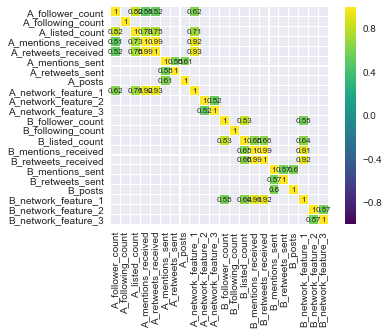

In [107]:
#checking the correlation
import seaborn as sns

corr = new_train.drop('Choice', axis=1).corr() # We already examined SalePrice correlations
%matplotlib inline
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

correlations = new_train.corr()['Choice']
print(correlations)

In [108]:
labels = new_train_data["Choice"]
del new_train_data['Choice']
for feature in train_data.columns:
    del new_train_data[feature+' '+'categories']
    del new_train_data[feature+' '+'scoresBinned']
attributes=new_train_data

In [133]:
algorithms=['logistic regression','Knn','Random forests','LinearSVC','Adboost','Multinomial NB','SGD','MLP']
metrics=[]
metric_labels=['accuracy score','precision score','recall score','f1 score','confusion matrix']

#train-test split
X_train,X_test,Y_train,Y_test=train_test_split(attributes, labels, test_size=0.2)
#Random Forest for feature selection
clf = RandomForestClassifier()
clf.fit(X_train,Y_train)
features = {}
for x,y in zip(X_train.columns,clf.feature_importances_):
    features[x] = y
selective_features=sorted(features,key=features.get,reverse=True)[0:8]
print(selective_features)

for i in X_train.columns:
    if i not in selective_features:
        del X_train[i]
        del X_test[i]
print(X_train.shape, X_test.shape)

#logistic regression
logit = LogisticRegression()
logit.fit(X_train,Y_train)

#accuracy of logistic regression using cross validation
accuracy1 = cross_val_score(logit, X_train, Y_train, cv = 5)
mean_accuracy = mean(accuracy1)
print("cross validation accuracy:",mean_accuracy)

#accuracy of logistic regression using accuracy score
Y_predicted=logit.predict(X_test)
accuracy2 = accuracy_score(Y_test, Y_predicted)
print("accuracy score:",accuracy2)

#precision score of logistic regression
# score = tp/(tp+fp)
precision1 = precision_score(Y_test, Y_predicted, average=None)
print("precision score:",precision1)

#recall score of logistic regression
recall1 = recall_score(Y_test, Y_predicted, average=None)
print("recall score:",recall1)

#f1 score of logistic regression
print("f1 score:",f1_score(Y_test, Y_predicted, average="weighted"))
print("Confusion matrix\n",confusion_matrix(Y_test, Y_predicted))
metrics.append([accuracy2,precision1,recall1,f1_score(Y_test, Y_predicted, average="weighted"),confusion_matrix(Y_test, Y_predicted)])

['A_follower_count', 'B_network_feature_1', 'A_mentions_received', 'B_follower_count', 'A_listed_count', 'B_listed_count', 'B_retweets_received', 'A_network_feature_1']
(4167, 8) (1042, 8)
cross validation accuracy: 0.742499589764
accuracy score: 0.774472168906
precision score: [ 0.7633452  0.7875   ]
recall score: [ 0.8079096   0.73972603]
f1 score: 0.774142985301
Confusion matrix
 [[429 102]
 [133 378]]


[  0.5   1.5   2.5   3.5   4.5   5.5   6.5   7.5   8.5   9.5  10.5  11.5
  12.5  13.5  14.5  15.5  16.5  17.5  18.5  19.5  20.5  21.5]


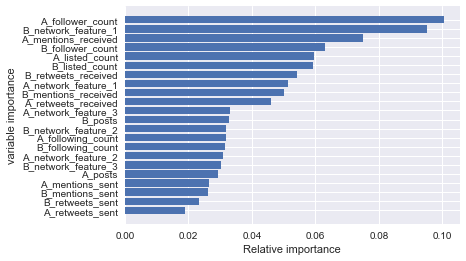

In [134]:
#feature importance plot
import numpy as np
pad = np.arange(len(features))+0.5
print(pad)
plt.barh(pad,sorted(features.values()),align = 'center')
plt.yticks(pad,sorted(features,key=features.get))
plt.xlabel("Relative importance")
plt.ylabel("variable importance")
plt.show()

In [135]:
#KNN classifier
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.metrics import auc,roc_curve
clf2=KNeighborsClassifier(n_neighbors=5)
clf2.fit(X_train,Y_train)

Y_predicted2 = clf2.predict(X_test)

accuracy3 = accuracy_score(Y_test, Y_predicted2)
print("accuracy score:",accuracy3)

precision2 = precision_score(Y_test, Y_predicted2, average=None)
print("precision score:",precision2)

recall2 = recall_score(Y_test, Y_predicted2, average=None)
print("recall score:",recall2)

print("f1 score:",f1_score(Y_test, Y_predicted2, average="weighted"))
print("Confusion matrix:\n",confusion_matrix(Y_test, Y_predicted2))
#fpr,tpr,threshold=roc_curve(Y_test,Y_predicted2)
#auc1=auc(fpr,tpr)
#print(auc1)
metrics.append([accuracy3,precision2,recall2,f1_score(Y_test, Y_predicted2, average="weighted"),confusion_matrix(Y_test, Y_predicted2)])

accuracy score: 0.74472168906
precision score: [ 0.74766355  0.74161736]
recall score: [ 0.75329567  0.73581213]
f1 score: 0.744699106136
Confusion matrix:
 [[400 131]
 [135 376]]


In [136]:
#prediction using Random forests
clf.fit(X_train,Y_train)
Y_predicted3=clf.predict(X_test)
accuracy4 = accuracy_score(Y_test, Y_predicted3)
print("accuracy score:",accuracy4)
precision3 = precision_score(Y_test, Y_predicted3, average=None)
print("precision score:",precision3)
recall3 = recall_score(Y_test, Y_predicted3, average=None)
print("recall score:",recall3)
print("f1 score:",f1_score(Y_test, Y_predicted3, average="weighted"))
print("Confusion matrix\n",confusion_matrix(Y_test, Y_predicted3))
metrics.append([accuracy4,precision3,recall3,f1_score(Y_test, Y_predicted3, average="weighted"),confusion_matrix(Y_test, Y_predicted3)])

accuracy score: 0.776391554702
precision score: [ 0.76232394  0.79324895]
recall score: [ 0.81544256  0.73581213]
f1 score: 0.775955911583
Confusion matrix
 [[433  98]
 [135 376]]


In [137]:
#SVM Classifier
from sklearn.svm import LinearSVC
clf3 = LinearSVC(random_state = 0, dual = False, fit_intercept= False)
clf3.fit(X_train, Y_train)
svm_predicted = clf3.predict(X_test)

#Accuracy score
accuracy5 = accuracy_score(Y_test,svm_predicted)
precision4 = precision_score(Y_test, svm_predicted, average=None)
recall4 = recall_score(Y_test, svm_predicted, average=None)
print("SVC accuracy score:",accuracy5)
print(clf3.coef_)
print(clf3.intercept_)
metrics.append([accuracy5,precision4,recall4,f1_score(Y_test, svm_predicted, average="weighted"),confusion_matrix(Y_test, svm_predicted)])

SVC accuracy score: 0.772552783109
[[ -5.42630621e-08   3.12821337e-05  -2.18723432e-05   1.33589423e-05
    5.89419073e-08  -3.71209081e-05   2.77959786e-05  -8.09533031e-06]]
0.0


In [139]:
#Adaboost
from sklearn.ensemble import AdaBoostClassifier
adaboost=AdaBoostClassifier()
adaboost.fit(X_train, Y_train)
ada_predicted = adaboost.predict(X_test)
#Accuracy score
ada_accuracy = accuracy_score(Y_test,ada_predicted)
precision5 = precision_score(Y_test, ada_predicted, average=None)
recall5 = recall_score(Y_test, ada_predicted, average=None)
print("adaboost accuracy score:",ada_accuracy)
metrics.append([ada_accuracy,precision5,recall5,f1_score(Y_test, ada_predicted, average="weighted"),confusion_matrix(Y_test, ada_predicted)])

adaboost accuracy score: 0.786948176583


In [140]:
#MultinomialNB
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train, Y_train)
mnb_predicted = mnb.predict(X_test)



#Accuracy score
mNb_accuracy = accuracy_score(Y_test,mnb_predicted)
precision6 = precision_score(Y_test, mnb_predicted, average=None)
recall6 = recall_score(Y_test, mnb_predicted, average=None)
print("NB accuracy score:",mNb_accuracy)
metrics.append([mNb_accuracy,precision6,recall6,f1_score(Y_test, mnb_predicted, average="weighted"),confusion_matrix(Y_test, mnb_predicted)])

NB accuracy score: 0.757197696737


In [141]:
#stochastic gradient descent
from sklearn.linear_model import SGDClassifier
clf4 = SGDClassifier(loss="hinge", penalty="l2")
clf4.fit(X_train, Y_train)
sgd_predicted = clf4.predict(X_test)

#Accuracy score
accuracy6 = accuracy_score(Y_test,sgd_predicted)
precision7 = precision_score(Y_test, sgd_predicted, average=None)
recall7 = recall_score(Y_test, sgd_predicted, average=None)
print("SGD accuracy score:",accuracy6)
metrics.append([accuracy6,precision7,recall7,f1_score(Y_test, sgd_predicted, average="weighted"),confusion_matrix(Y_test, sgd_predicted)])

SGD accuracy score: 0.759117082534


In [142]:
#MLP classsifier
from sklearn.neural_network import MLPClassifier
clf5 = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5), random_state=1)
clf5.fit(X_train, Y_train)
mlp_predicted = clf5.predict(X_test)

#Accuracy score
accuracy7 = accuracy_score(Y_test,mlp_predicted)
precision8 = precision_score(Y_test, mlp_predicted, average=None)
recall8 = recall_score(Y_test, mlp_predicted, average=None)
metrics.append([accuracy7,precision8,recall8,f1_score(Y_test, mlp_predicted, average="weighted"),confusion_matrix(Y_test, mlp_predicted)])
print("MLP accuracy score:",accuracy7)


MLP accuracy score: 0.687140115163


In [146]:
metrics_df=pd.DataFrame(metrics)
metrics_df.columns=metric_labels
metrics_df.index=algorithms
metrics_df

,accuracy score,precision score,recall score,f1 score,confusion matrix
logistic regression,0.774472,"[0.76334519573, 0.7875]","[0.80790960452, 0.739726027397]",0.774143,"[[429, 102], [133, 378]]"
Knn,0.744722,"[0.747663551402, 0.741617357002]","[0.75329566855, 0.735812133072]",0.744699,"[[400, 131], [135, 376]]"
Random forests,0.776392,"[0.762323943662, 0.793248945148]","[0.815442561205, 0.735812133072]",0.775956,"[[433, 98], [135, 376]]"
LinearSVC,0.772553,"[0.761565836299, 0.785416666667]","[0.806026365348, 0.737769080235]",0.772221,"[[428, 103], [134, 377]]"
Adboost,0.786948,"[0.804733727811, 0.770093457944]","[0.768361581921, 0.80626223092]",0.786929,"[[408, 123], [99, 412]]"
Multinomial NB,0.757198,"[0.756457564576, 0.758]","[0.772128060264, 0.74168297456]",0.757121,"[[410, 121], [132, 379]]"
SGD,0.759117,"[0.748226950355, 0.771966527197]","[0.79472693032, 0.722113502935]",0.758728,"[[422, 109], [142, 369]]"
MLP,0.687140,"[0.92531120332, 0.615480649189]","[0.419962335217, 0.964774951076]",0.662954,"[[223, 308], [18, 493]]"
